In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
nuts = pd.read_csv('/Users/vokeojuederhie/PycharmProjects/untitled6/timeseries.csv', parse_dates=['invoice_date'], index_col='invoice_date')
nuts_series = nuts.dropna(axis=0)
nuts_series

,net_weight
invoice_date,
2015-03-05,131.0
2015-03-06,164.0
2015-03-07,187.0
2015-03-08,235.0
2015-03-09,213.0
...,...
2015-06-03,296.0
2015-06-04,313.0
2015-06-05,267.0


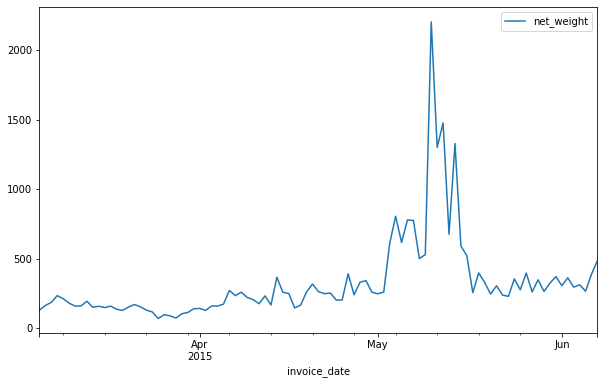

In [3]:
nuts_series.plot()

              net_weight
invoice_date            
2015-03-05           NaN
2015-03-06           NaN
2015-03-07           NaN
2015-03-08           NaN
2015-03-09           NaN
...                  ...
2015-06-03    316.500000
2015-06-04    323.416667
2015-06-05    316.083333
2015-06-06    325.416667
2015-06-07    333.000000

[95 rows x 1 columns]               net_weight
invoice_date            
2015-03-05           NaN
2015-03-06           NaN
2015-03-07           NaN
2015-03-08           NaN
2015-03-09           NaN
...                  ...
2015-06-03     51.794173
2015-06-04     44.174156
2015-06-05     45.731347
2015-06-06     48.381924
2015-06-07     64.925132

[95 rows x 1 columns]


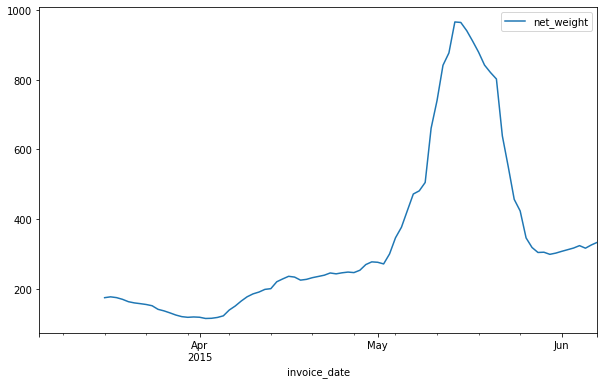

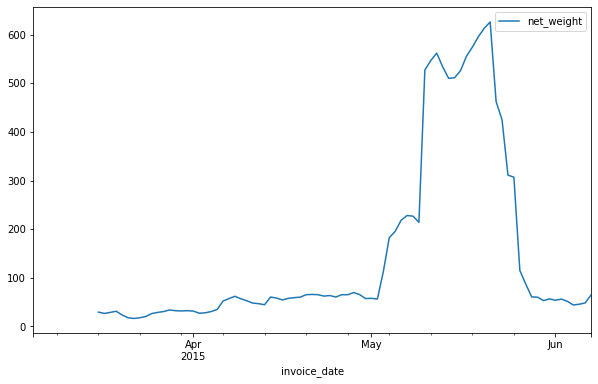

In [4]:
nuts_series_ma = nuts_series.rolling(window=12).mean()
nuts_series_std = nuts_series.rolling(window=12).std()

nuts_series_ma.plot()
nuts_series_std.plot()

print(nuts_series_ma, nuts_series_std)

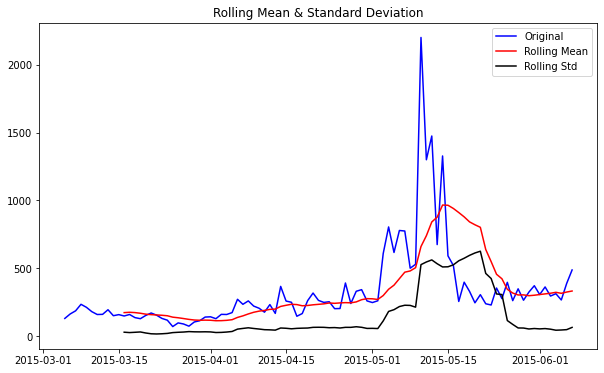

In [5]:
orig = plt.plot(nuts_series, color='blue', label='Original')
mean = plt.plot(nuts_series_ma, color='red', label='Rolling Mean')
std = plt.plot(nuts_series_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
# Performing Dickey - Fuller Test:

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(nuts_series['net_weight'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'No of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic            -2.259716
p-value                    0.185290
#Lags Used                 4.000000
No of Observation Used    90.000000
Critical Value(1%)        -3.505190
Critical Value(5%)        -2.894232
Critical Value(10%)       -2.584210
dtype: float64


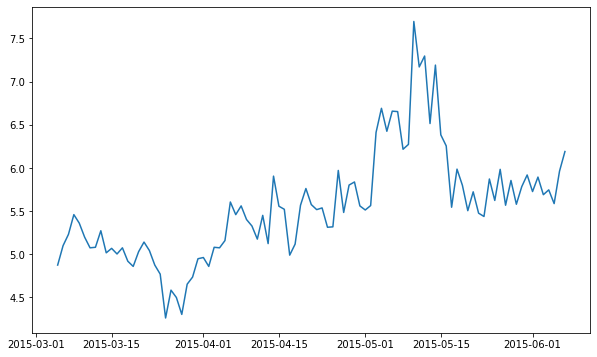

In [11]:
nuts_series_logScale = np.log(nuts_series)
plt.plot(nuts_series_logScale)

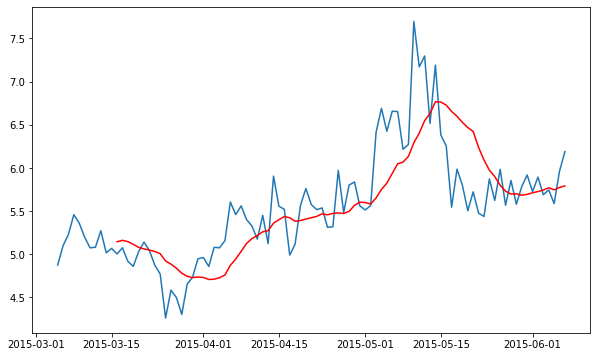

In [12]:
movingAverage = nuts_series_logScale.rolling(window=12).mean()
movingSTD =nuts_series_logScale.rolling(window=12).std()
plt.plot(nuts_series_logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [13]:
logScaleMinusMovingAverage = nuts_series_logScale - movingAverage
logScaleMinusMovingAverage.head(12)

# Remove Non Values
logScaleMinusMovingAverage.dropna(inplace=True)
logScaleMinusMovingAverage.head(10)

,net_weight
invoice_date,
2015-03-16,-0.141492
2015-03-17,-0.086929
2015-03-18,-0.227131
2015-03-19,-0.256358
2015-03-20,-0.049971
2015-03-21,0.079557
2015-03-22,-0.005758
2015-03-23,-0.157321
2015-03-24,-0.235941


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    # Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Average')
    std = plt.plot(movingSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries['net_weight'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)

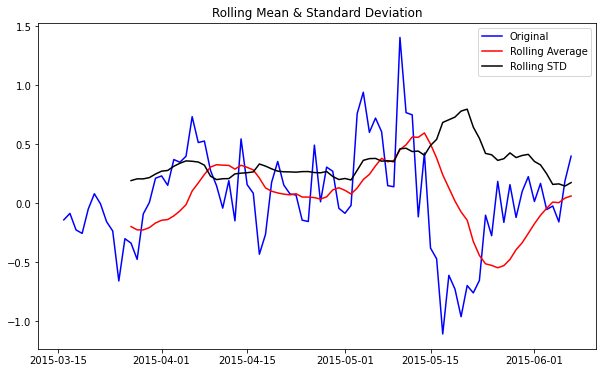

Results of Dickey-Fuller Test: 
Test Statistic                -3.607244
p-value                        0.005624
#Lags Used                     8.000000
Number of Observation Used    75.000000
Critical Value(1%)            -3.520713
Critical Value(5%)            -2.900925
Critical Value(10%)           -2.587781
dtype: float64


In [15]:
test_stationarity(logScaleMinusMovingAverage)

In [16]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(logScaleMinusMovingAverage['net_weight'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'No of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic            -3.607244
p-value                    0.005624
#Lags Used                 8.000000
No of Observation Used    75.000000
Critical Value(1%)        -3.520713
Critical Value(5%)        -2.900925
Critical Value(10%)       -2.587781
dtype: float64


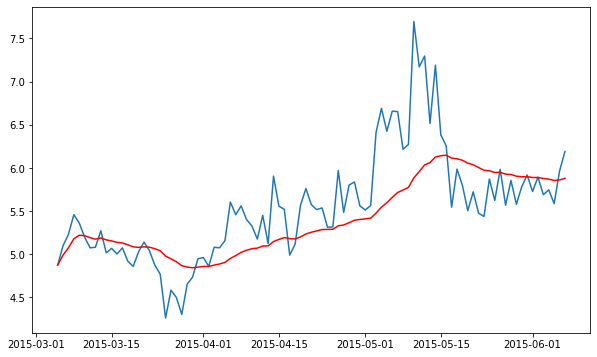

In [17]:
exponentialDecayWeightAverage = nuts_series_logScale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(nuts_series_logScale)
plt.plot(exponentialDecayWeightAverage, color='red')

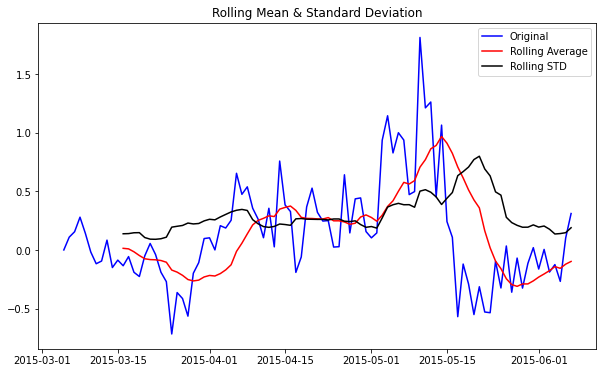

Results of Dickey-Fuller Test: 
Test Statistic                -2.616631
p-value                        0.089609
#Lags Used                     1.000000
Number of Observation Used    93.000000
Critical Value(1%)            -3.502705
Critical Value(5%)            -2.893158
Critical Value(10%)           -2.583637
dtype: float64


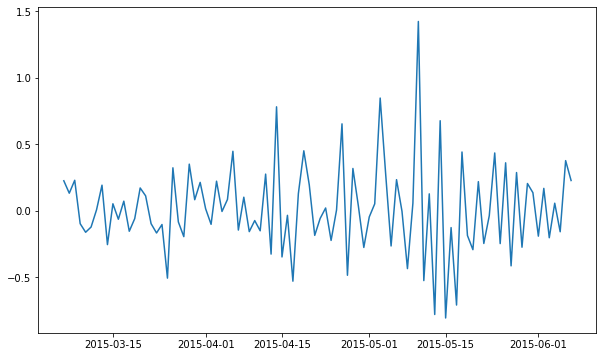

In [20]:
logScaleMinusMovingExponentialDecayAverage = nuts_series_logScale - exponentialDecayWeightAverage
test_stationarity(logScaleMinusMovingExponentialDecayAverage)

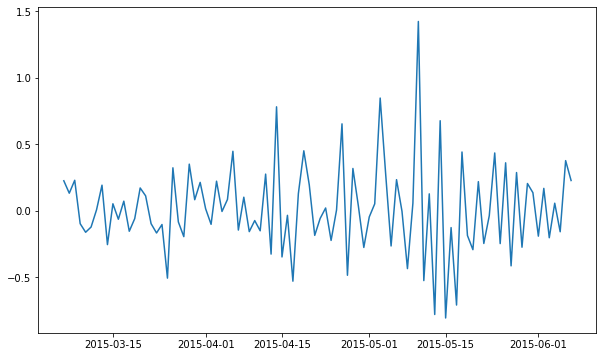

In [18]:
logDiffShifting = nuts_series_logScale - nuts_series_logScale.shift()
plt.plot(logDiffShifting)

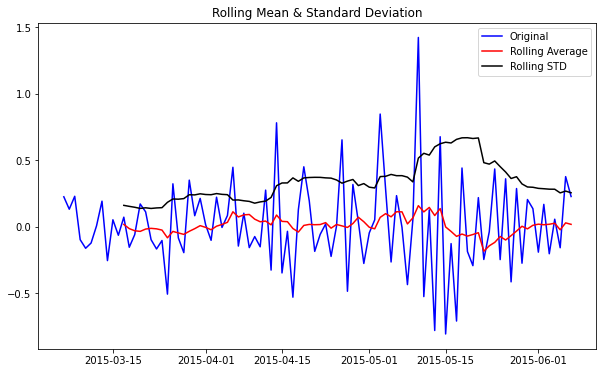

Results of Dickey-Fuller Test: 
Test Statistic               -1.395479e+01
p-value                       4.632437e-26
#Lags Used                    0.000000e+00
Number of Observation Used    9.300000e+01
Critical Value(1%)           -3.502705e+00
Critical Value(5%)           -2.893158e+00
Critical Value(10%)          -2.583637e+00
dtype: float64


In [19]:
logDiffShifting.dropna(inplace=True)
test_stationarity(logDiffShifting)

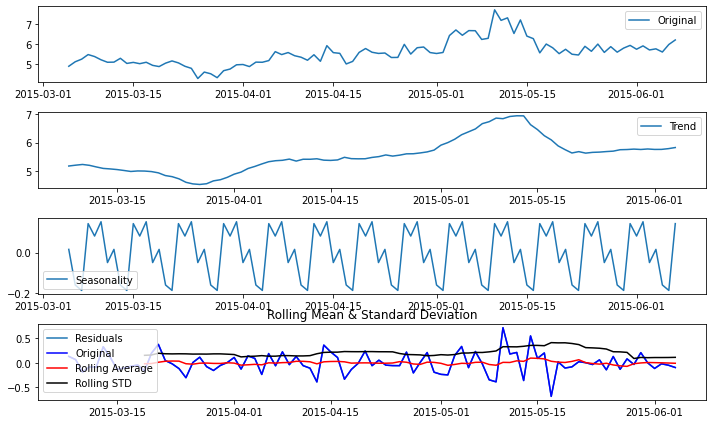

Results of Dickey-Fuller Test: 


KeyError: 'net_weight'

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(nuts_series_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(nuts_series_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity((decomposedLogData))

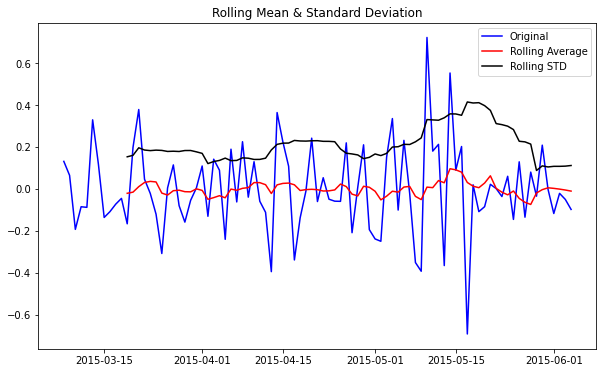

Results of Dickey-Fuller Test: 


KeyError: 'net_weight'

In [21]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity((decomposedLogData))

/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


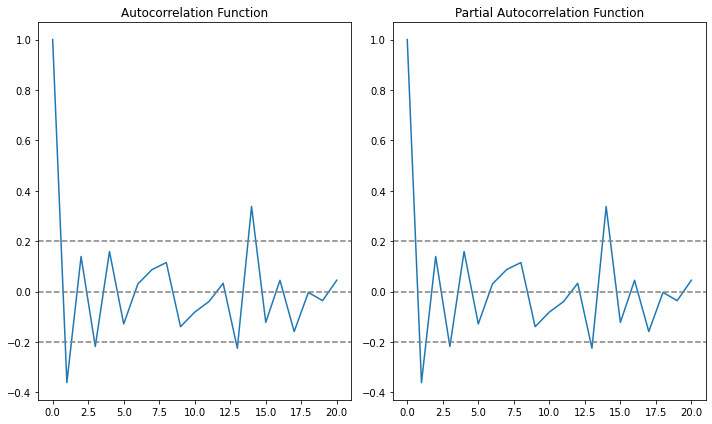

In [27]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(logDiffShifting, nlags=20)
lag_pacf = pacf(logDiffShifting, nlags=20, method='ols')

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(logDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(logDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


# Plot PACF:
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(logDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(logDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequ

Plotting AR Models


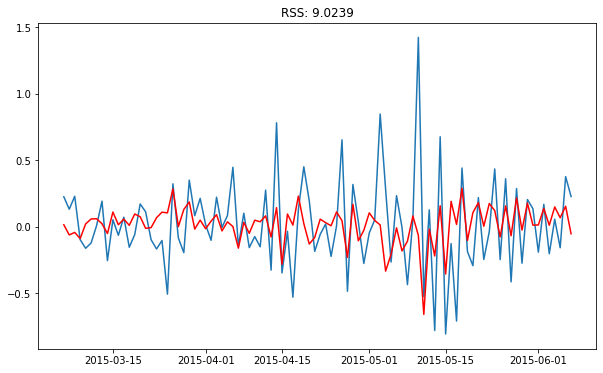

In [33]:
from statsmodels.tsa.arima_model import ARIMA

# AR MODEL
model = ARIMA(nuts_series_logScale, order=(2,1,1))
results_AR = model.fit(disp=1)
plt.plot(logDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-logDiffShifting['net_weight'])**2))
print('Plotting AR Models')

/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequ

Plotting AR Models


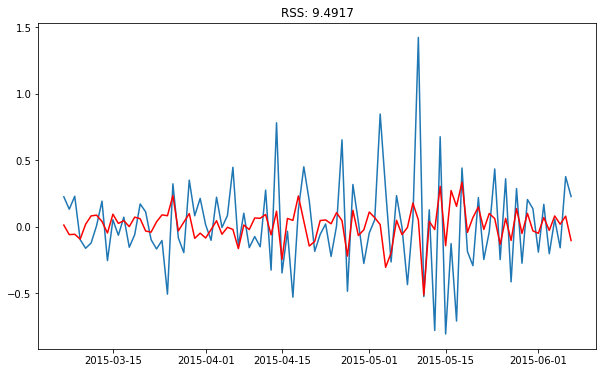

In [34]:
# MA MODEL
model = ARIMA(nuts_series_logScale, order=(0,1,2))
results_AR = model.fit(disp=1)
plt.plot(logDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-logDiffShifting['net_weight'])**2))
print('Plotting AR Models')

/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequ

Plotting AR Models


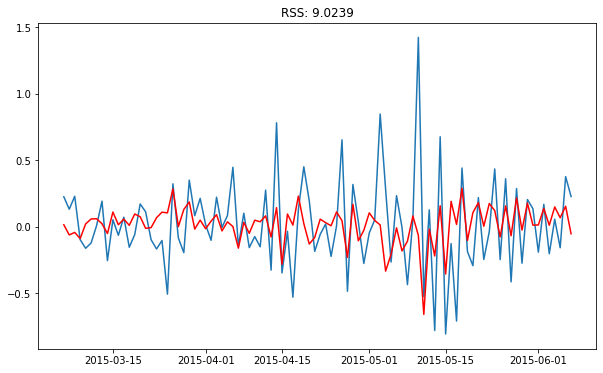

In [36]:
model = ARIMA(nuts_series_logScale, order=(2,1,1))
results_AR = model.fit(disp=1)
plt.plot(logDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-logDiffShifting['net_weight'])**2))
print('Plotting AR Models')

In [37]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

invoice_date
2015-03-06    0.014082
2015-03-07   -0.062448
2015-03-08   -0.043290
2015-03-09   -0.090037
2015-03-10    0.020155
                ...   
2015-06-03    0.010157
2015-06-04    0.148314
2015-06-05    0.067047
2015-06-06    0.153456
2015-06-07   -0.054086
Length: 94, dtype: float64


In [40]:
# convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum
print(predictions_ARIMA_diff_cumsum)

<bound method Series.cumsum of invoice_date
2015-03-06    0.014082
2015-03-07   -0.062448
2015-03-08   -0.043290
2015-03-09   -0.090037
2015-03-10    0.020155
                ...   
2015-06-03    0.010157
2015-06-04    0.148314
2015-06-05    0.067047
2015-06-06    0.153456
2015-06-07   -0.054086
Length: 94, dtype: float64>


In [45]:
predictions_ARIMA_log = pd.Series(nuts_series_logScale['net_weight'], index=nuts_series_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

TypeError: <class 'method'>